# Primer Parcial - Análisis Descriptivo (50%)
## Realizar las siguientes actividades para el dataset[lexicon_emotions_es].
1. Calcular la Media, Moda, Desviación estándar, valor máximo y mínimo por tipo de emoción.
2. Graficar caja bigote por cada emoción.
3. Realizar un gráfico que contenga las distribuciones de cada emoción en un solo gráfico. 
4. Realizar un análisis multi variable de las emociones.
5. Realizar un gráfico tipo Scatter plot y  Large tree map por emociones.

## Leonardo David Monsalvo Camacho --> T00047540

## Librerías a utilizar

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

## Observación de los valores del dataset
Existe una particularidad con el dataset, en el anterior trabajo, con el dataset que pesaba 5GB podía leerse de manera normal, pero en este fue necesario colocarle limitadores por ; para que pudiera leer los archivos a la perfección

In [2]:
df = pd.read_csv('lexicon_emotions_es.csv', sep=';')
df = df.sample(frac=1)
df

,word,emotion,value,num
5,abatido,Tristeza,"0,865",1
657,desagraviar,Alegria,"0,231",1
1310,injuriante,Repulsion,"0,498",1
1072,felicidad,Alegria,"1,000",1
1194,histeria,Miedo,"0,562",1
...,...,...,...,...
1203,horrendamente,Miedo,"0,731",1
1790,repugnante,Repulsion,"0,932",1
1827,sangriento,Miedo,"0,496",2
895,enérgico,Enojo,"0,431",1


## Normalización de los datos
Es muy importante la normalización de los datos de un dataset, debido a que los datos no siempre pueden ser legibles por el programa que estamos utilizando si no hacemos uso de la normalización de datos, más adelante se podrían tener problemas al mostrar ciertos tipos de datos como nan por poner un ejemplo, a lo mejor ese nan significa que no se muestra nada, pero el mensaje a mostrar no es el más adecuado, lo mejor es normalizar el dato pensando en el tipo de dato que este pueda ser

In [3]:
df['num'] = df['num'].fillna(0.0)
df['emotion'] = df['emotion'].fillna('None')
df['word'] = df['word'].fillna('None')
df['value'] = df['value'].fillna(0.0)

## Normalización de los tipos de datos
La normalización por tipo de datos también es sumamente importante, puesto que si dejas todos los datos digamos que de forma object y más adelante necesites los datos tipados y con un tipo de datos solidos, tendrás conflictos a la hora de trabajar. Como ejemplo está esta columna de value, está columna inicialmente viene como tipo object, pero al mostrar los datos sabemos que debe ser de tipo flotante, que pasa si no se normaliza este tipo de datos; Sencillo, cuando quieras usarlo como propiedades de calculos o gráficas, simplemente va a arrojar mensajes de error donde dirá que no es posible hacer operaciones númericas entre datos de tipo string, ese entre muchos otros errores.

In [4]:
#df['value'] = pd.to_numeric(df['value'], errors='coerce')
df['value'] = df.value.str.replace(',', '.').astype(float)

### Calcular la Media, Moda, Desviación estándar, valor máximo y mínimo por tipo de emoción

In [5]:
media = df.groupby(df['emotion'])['value'].mean()
moda = df.groupby(df['emotion'])['value'].agg(pd.Series.mode)
desvi = df.groupby(df['emotion'])['value'].std()
maxi = df.groupby(df['emotion'])['value'].max()
mini = df.groupby(df['emotion'])['value'].min()

* **Media**: La media de un conjunto de números, algunas ocasiones simplemente llamda el promedio , es la suma de los datos dividida entre el número total de datos. 
* **Moda**: La moda de un conjunto de números es el número que aparece más a menudo.
* **Desviación estándar**: La desviación estándar es la medida de dispersión más común, que indica qué tan dispersos están los datos con respecto a la media. Mientras mayor sea la desviación estándar, mayor será la dispersión de los datos.
* **Máximo**: Devuelve el valor Máximo de una lista de valores.
* **Mínimo**: Devuelve el valor mínimo de una lista de valores

In [6]:
print("Media\n\n", media, "\n\nModa\n\n", moda, "\n\nDesviación estándar\n\n", desvi, "\n\nMáximo\n\n", maxi, "\n\nMínimo\n\n", mini)

Media

 emotion
Alegria      0.537638
Enojo        0.545848
Miedo        0.604314
Repulsion    0.666067
Sorpresa     0.487109
Tristeza     0.519695
Name: value, dtype: float64 

Moda

 emotion
Alegria      0.363
Enojo        0.463
Miedo        0.831
Repulsion    0.932
Sorpresa     0.966
Tristeza     0.264
Name: value, dtype: float64 

Desviación estándar

 emotion
Alegria      0.238053
Enojo        0.216434
Miedo        0.244571
Repulsion    0.194943
Sorpresa     0.286430
Tristeza     0.231858
Name: value, dtype: float64 

Máximo

 emotion
Alegria      1.000
Enojo        0.966
Miedo        1.000
Repulsion    1.000
Sorpresa     0.966
Tristeza     0.966
Name: value, dtype: float64 

Mínimo

 emotion
Alegria      0.000
Enojo        0.000
Miedo        0.033
Repulsion    0.132
Sorpresa     0.033
Tristeza     0.033
Name: value, dtype: float64


## Trabajando con respecto a solo una columna, sin agrupar nada

In [7]:
values = df[{'emotion':['min', 'max','std','skew']}].describe(include = 'all')
y = df['emotion'].value_counts()
x = df[{'emotion':['min', 'max','std','skew']}].value_counts().describe(include = 'all')

* **Values**: La variable values por estar usando el describe all, será capaz de mostrar todas las propiedades que contenga su librería.
    solo mostrará datos relevantes para columnas que contengan números. Contará el valor total de la columna, los atributos únicos, el más repetido y la cantidad de veces que se repita.
* **Y**: En este caso, esta, al tener la propiedad de value_counts será capaz de mostrar los atributos de la columna sobre la que se este trabajando
    y además, contar la cantidad existente de dichos atributos.
* **X**: Capaz de hacer el cálculo de casi todas las medidas estadísticas.

In [8]:
print (values,"\n")
print(y,"\n")
print(x)

        emotion
count      2033
unique        6
top     Alegria
freq        668 

Alegria      668
Tristeza     390
Enojo        382
Miedo        210
Repulsion    209
Sorpresa     174
Name: emotion, dtype: int64 

count      6.000000
mean     338.833333
std      186.256186
min      174.000000
25%      209.250000
50%      296.000000
75%      388.000000
max      668.000000
dtype: float64


### Graficar caja bigote por cada emoción

Es una forma de describir las puntuaciones que contiene una variable y su distribución de forma visual. Con este diagrama se representan varios estadísticos descriptivos.

* **Mediana**: Es la línea negra más gruesa que está dentro de la caja azul. La mediana de una variable es su valor central. Ojo, los datos siempre deben estar ordenados de menor a mayor para saber cual es la mediana o el valor del centro. Podemos ver que la tristeza y la sorpresa tienen medianas similares, al igual que la alegría y el enojo.
* **Cuartiles**: El 1º Cuartil (Q1) y el 3º Cuartil (Q3) delimitan los límites inferior (Q1) y superior (Q3) de la caja. Son 4 cuartiles. Y podemos notar que todas las cajas se diferencian en cuanto a la oscilación de estos.
* **Bigotes**: Las rayas verticales sirven para ver entre qué puntuaciones se mueve la variable. Dicho de otro modo, sirve para identificar el valor máximo y el valor mínimo de la variable, y lo que es más útil, para identificar casos con valores atípicos (o extremos).
    * **Bigote superior**: Puntuación más alta de la variable (Dentro del límite superior para casos extremos leves).
    * **Bigote inferior**: Puntuación más baja de la variable (Dentro del límite inferior para casos extremos leves).

<AxesSubplot:xlabel='value', ylabel='emotion'>

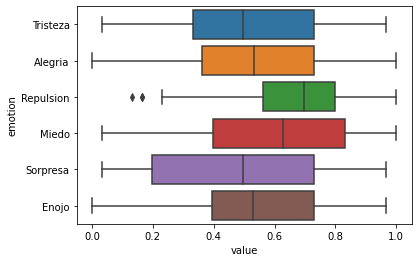

In [9]:
sns.boxplot(x='value', y='emotion', data=df)

### Realizar un gráfico que contenga las distribuciones de cada emoción en un solo gráfico

c:\python38\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


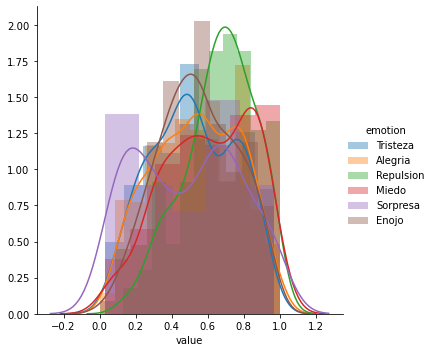

In [10]:
sns.FacetGrid(df, hue='emotion', size=5).map(sns.distplot, 'value').add_legend()

### Realizar un análisis multi variable de las emociones

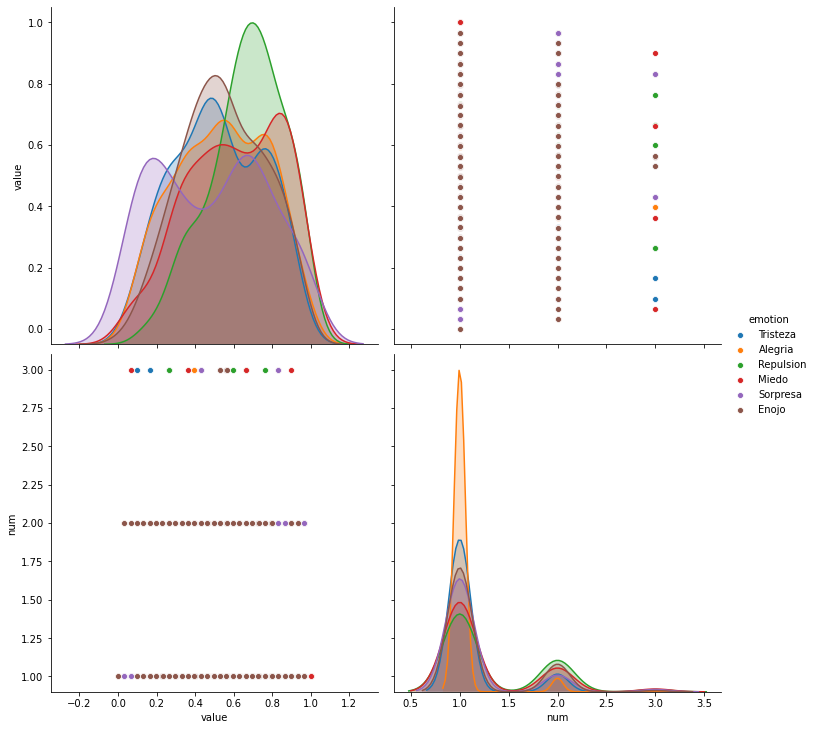

In [11]:
sns.pairplot(df, hue='emotion', height=5)
plt.show()

## Realizar un gráfico tipo Scatter plot

Podremos observar que tan disperso están los datos de cada emoción y dependiendo de la dispersión de dichos datos, podremos afirmar lo siguiente, si la dispersión es amplia, eso signfica que la dispersión está asociada a la media, en este caso al ser una desviación bastante apegada podemos decir que su desviación estandar no es tan alta.

<AxesSubplot:xlabel='emotion', ylabel='value'>

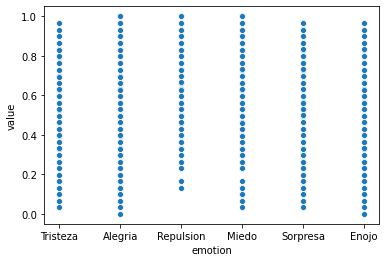

In [12]:
sns.scatterplot(x='emotion',y='value',data=df)

## Large tree map por emociones

Los mapas de árbol son visualizaciones de datos jerárquicos. Están formados por una serie de rectángulos anidados de tamaños proporcionales al valor de datos correspondiente. Un rectángulo grande representa una rama de un árbol de datos y se subdivide en rectángulos más pequeños que representan el tamaño de cada nodo dentro de esa rama.

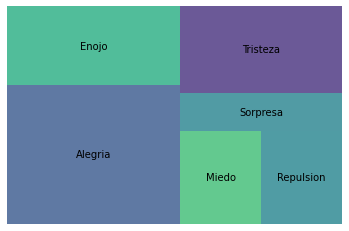

In [13]:
group = df.groupby(df['emotion']).size().reset_index(name='quantity')  
squarify.plot(sizes= group['quantity'], label=group['emotion'], alpha=.8 )
plt.axis('off')
plt.show()